In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
import pandas as pd
from numpy import vstack
from numpy import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import time 
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# import BatchNormalization
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# path = 'EDA_clean_data.xlsx'
path = 'EDAFeatures_forall_individual_MinMax.xlsx'
# path = 'EDAFeatures_forall_individual_Std.xlsx'
# path = 'EDAFeatures_ind_norm_clusters.xlsx'
df = pd.read_excel(path, index_col=0)
display(df.head())
display(df.shape)

In [ ]:
def qd_objective_paper(y_true,y_pred):

    y_U = y_pred[:,0]
    y_L = y_pred[:,1]
    y_T = y_true[:,0]

    N_ = tf.cast(tf.size(y_T),tf.float32) # sample size
    alpha_in = tf.constant(alpha_)
    lambda_in = tf.constant(lambda_) 

    # in case want to do point predictions
    y_pred_mean = tf.reduce_mean(y_pred,axis=1)
    MPIW = tf.reduce_mean(tf.subtract(y_U,y_L))

    # soft uses sigmoid
    gamma_U = tf.sigmoid((y_U - y_T)*soften_)
    gamma_L = tf.sigmoid((y_T - y_L)*soften_)
    gamma_ = tf.multiply(gamma_U,gamma_L)
    ones_ = tf.ones_like(gamma_)

    # hard uses sign step fn
    gamma_U_hard = tf.maximum(0.,tf.sign(y_U - y_T))
    gamma_L_hard = tf.maximum(0.,tf.sign(y_T - y_L))
    gamma_hard = tf.multiply(gamma_U_hard,gamma_L_hard)

    # lube - lower upper bound estimation
    qd_lhs_hard = tf.divide(tf.reduce_sum(tf.abs(y_U - y_L)*gamma_hard), tf.reduce_sum(gamma_hard)+0.001)
    qd_lhs_soft = tf.divide(tf.reduce_sum(tf.abs(y_U - y_L)*gamma_), tf.reduce_sum(gamma_)+0.001) # add small noise in case 0
    PICP_soft = tf.reduce_mean(gamma_)
    PICP_hard = tf.reduce_mean(gamma_hard)
    qd_rhs_soft = lambda_in*tf.sqrt(N_)* tf.square(tf.maximum(0., (1. - alpha_in) - PICP_soft))
    qd_rhs_hard = lambda_in*tf.sqrt(N_)* tf.square(tf.maximum(0., (1. - alpha_in) - PICP_hard))
    # old method
    qd_loss_soft = qd_lhs_hard + qd_rhs_soft # full LUBE w sigmoid for PICP

    return qd_loss_soft

-------------iteartion--------------  0
Mert new loss
Mert new loss


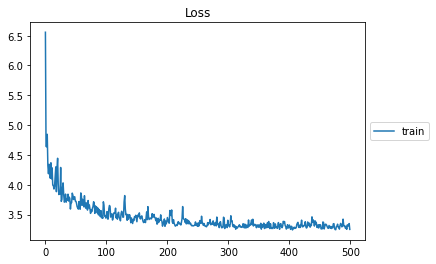

Training results
PICP: 0.9207432138191319
MPIW: 3.093
Test results
PICP: 0.905977945443993
MPIW: 3.093
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 0, 0.905977945443993, 3.093, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test


(1723, 4)
duration is  0.5995984117190043
-------------iteartion--------------  1
Mert new loss
Mert new loss


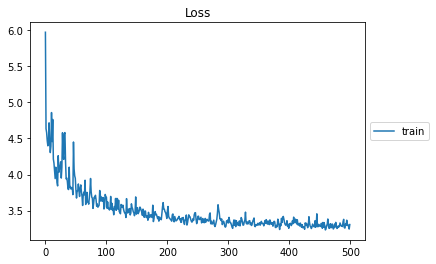

Training results
PICP: 0.9142110611119175
MPIW: 3.076
Test results
PICP: 0.9088798607080674
MPIW: 3.074
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 1, 0.9088798607080674, 3.074, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test


(3446, 4)
duration is  0.7638193964958191
-------------iteartion--------------  2
Mert new loss
Mert new loss


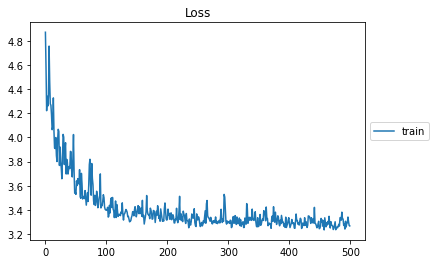

Training results
PICP: 0.9203077369719843
MPIW: 3.072
Test results
PICP: 0.901915264074289
MPIW: 3.062
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 2, 0.901915264074289, 3.062, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test


(5169, 4)
duration is  0.7666418790817261
-------------iteartion--------------  3
Mert new loss
Mert new loss


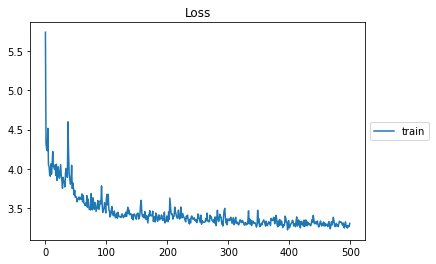

Training results
PICP: 0.9232109159529684
MPIW: 3.15
Test results
PICP: 0.9129425420777714
MPIW: 3.135
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 3, 0.9129425420777714, 3.135, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test


(6892, 4)
duration is  1.4004536072413127
-------------iteartion--------------  4
Mert new loss
Mert new loss


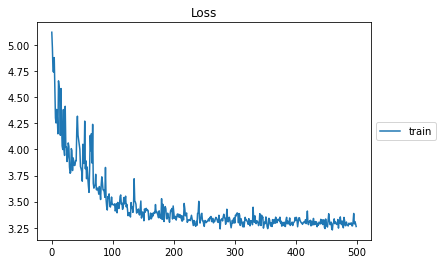

Training results
PICP: 0.9240818696472638
MPIW: 3.115
Test results
PICP: 0.9175856065002902
MPIW: 3.132
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 4, 0.9175856065002902, 3.132, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(8615, 4)
duration is  0.7470963875452677
-------------iteartion--------------  5
Mert new loss
Mert new loss


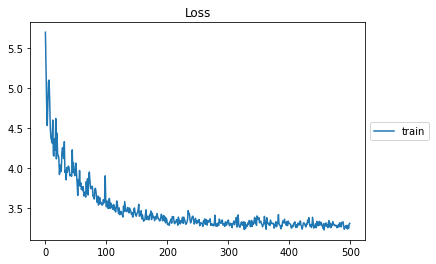

Training results
PICP: 0.9255334591377559
MPIW: 3.179
Test results
PICP: 0.9094602437608822
MPIW: 3.198
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 5, 0.9094602437608822, 3.198, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(10338, 4)
duration is  0.7552205602327983
-------------iteartion--------------  6
Mert new loss
Mert new loss


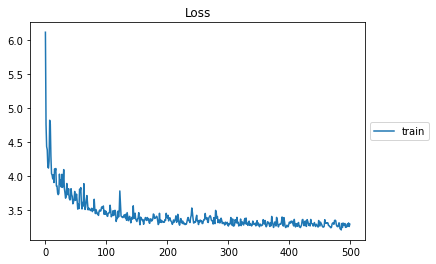

Training results
PICP: 0.9364203803164465
MPIW: 3.231
Test results
PICP: 0.926871735345328
MPIW: 3.248
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 6, 0.926871735345328, 3.248, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(12061, 4)
duration is  0.7339137673377991
-------------iteartion--------------  7
Mert new loss
Mert new loss


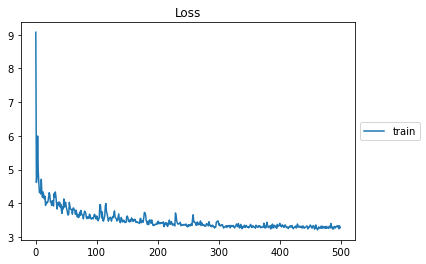

Training results
PICP: 0.9250979822906082
MPIW: 3.141
Test results
PICP: 0.9048171793383634
MPIW: 3.139
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 7, 0.9048171793383634, 3.139, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(13784, 4)
duration is  0.7246823151906331
-------------iteartion--------------  8
Mert new loss
Mert new loss


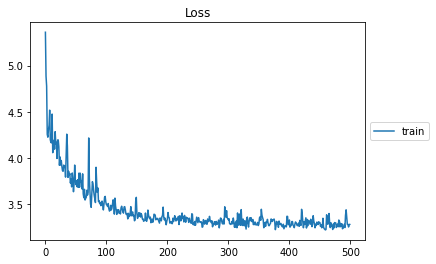

Training results
PICP: 0.9285817970677892
MPIW: 3.166
Test results
PICP: 0.9175856065002902
MPIW: 3.164
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 8, 0.9175856065002902, 3.164, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(15507, 4)
duration is  1.3924107035001119
-------------iteartion--------------  9
Mert new loss
Mert new loss


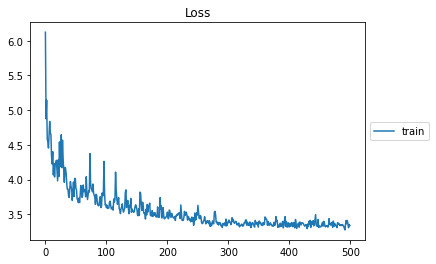

Training results
PICP: 0.9259689359849035
MPIW: 3.155
Test results
PICP: 0.9123621590249564
MPIW: 3.179
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 9, 0.9123621590249564, 3.179, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(17230, 4)
duration is  0.6958482384681701
-------------iteartion--------------  10
Mert new loss
Mert new loss


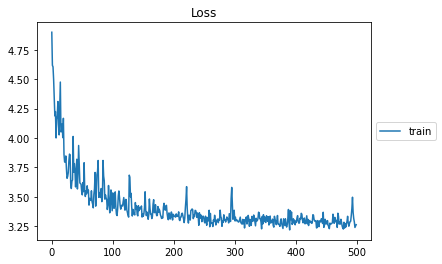

Training results
PICP: 0.9269850486282479
MPIW: 3.122
Test results
PICP: 0.9158444573418456
MPIW: 3.153
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 10, 0.9158444573418456, 3.153, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(18953, 4)
duration is  0.6445218602816264
-------------iteartion--------------  11
Mert new loss
Mert new loss


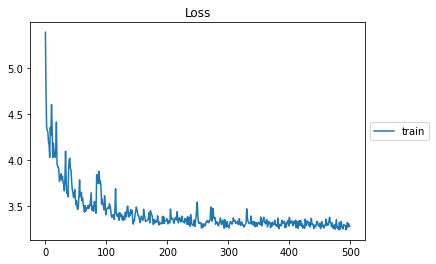

Training results
PICP: 0.9293075918130352
MPIW: 3.167
Test results
PICP: 0.91874637260592
MPIW: 3.182
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 11, 0.91874637260592, 3.182, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(20676, 4)
duration is  0.6540753642717997
-------------iteartion--------------  12
Mert new loss
Mert new loss


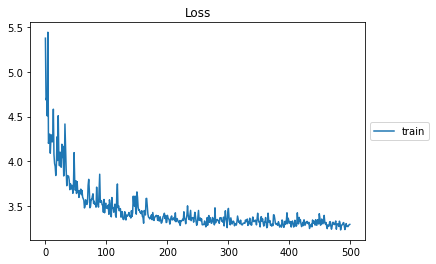

Training results
PICP: 0.9316301349978227
MPIW: 3.201
Test results
PICP: 0.9204875217643644
MPIW: 3.19
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 12, 0.9204875217643644, 3.19, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(22399, 4)
duration is  1.3930818955103557
-------------iteartion--------------  13
Mert new loss
Mert new loss


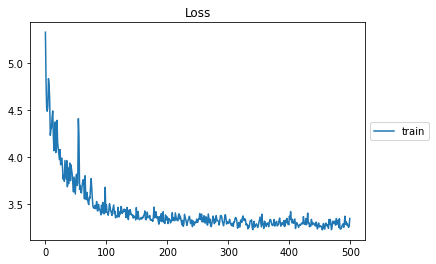

Training results
PICP: 0.9301785455073305
MPIW: 3.211
Test results
PICP: 0.9193267556587348
MPIW: 3.225
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 13, 0.9193267556587348, 3.225, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(24122, 4)
duration is  0.7038514296213786
-------------iteartion--------------  14
Mert new loss
Mert new loss


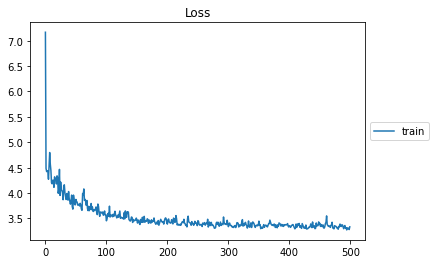

Training results
PICP: 0.9259689359849035
MPIW: 3.188
Test results
PICP: 0.930934416715032
MPIW: 3.186
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 14, 0.930934416715032, 3.186, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(25845, 4)
duration is  0.7141708850860595
-------------iteartion--------------  15
Mert new loss
Mert new loss


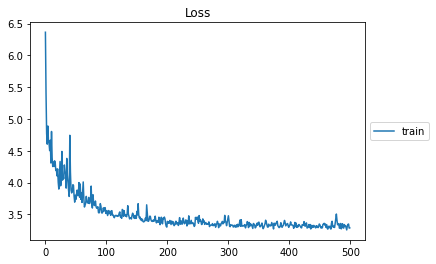

Training results
PICP: 0.9271302075772971
MPIW: 3.163
Test results
PICP: 0.9274521183981428
MPIW: 3.16
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 15, 0.9274521183981428, 3.16, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(27568, 4)
duration is  0.6943317254384359
-------------iteartion--------------  16
Mert new loss
Mert new loss


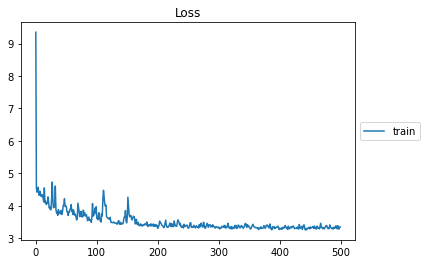

Training results
PICP: 0.9319204528959211
MPIW: 3.23
Test results
PICP: 0.9355774811375508
MPIW: 3.247
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 16, 0.9355774811375508, 3.247, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(29291, 4)
duration is  0.7014600078264872
-------------iteartion--------------  17
Mert new loss
Mert new loss


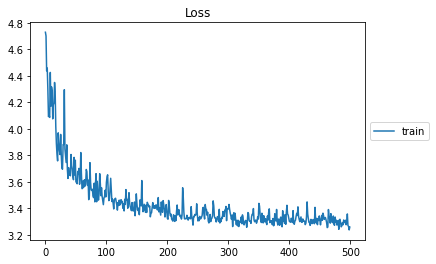

Training results
PICP: 0.9307591813035274
MPIW: 3.198
Test results
PICP: 0.9216482878699942
MPIW: 3.191
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 17, 0.9216482878699942, 3.191, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(31014, 4)
duration is  0.6889817476272583
-------------iteartion--------------  18
Mert new loss
Mert new loss


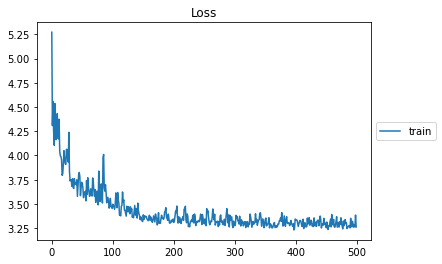

Training results
PICP: 0.9252431412396575
MPIW: 3.119
Test results
PICP: 0.9094602437608822
MPIW: 3.091
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 18, 0.9094602437608822, 3.091, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(32737, 4)
duration is  0.6935200969378154
-------------iteartion--------------  19
Mert new loss
Mert new loss


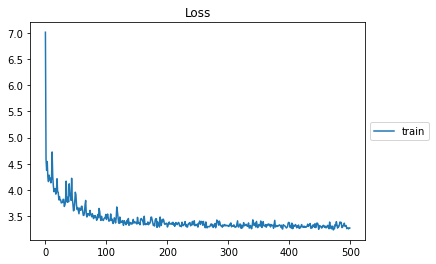

Training results
PICP: 0.92843663811874
MPIW: 3.159
Test results
PICP: 0.9233894370284388
MPIW: 3.166
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 19, 0.9233894370284388, 3.166, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(34460, 4)
duration is  0.7114826083183289
-------------iteartion--------------  20
Mert new loss
Mert new loss


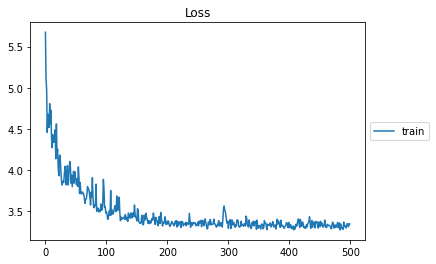

Training results
PICP: 0.9362752213673973
MPIW: 3.28
Test results
PICP: 0.9367382472431804
MPIW: 3.276
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 20, 0.9367382472431804, 3.276, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(36183, 4)
duration is  0.7112721959749858
-------------iteartion--------------  21
Mert new loss
Mert new loss


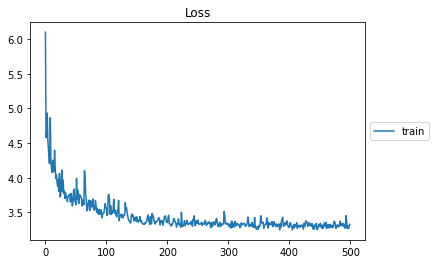

Training results
PICP: 0.9243721875453622
MPIW: 3.143
Test results
PICP: 0.9170052234474754
MPIW: 3.133
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 21, 0.9170052234474754, 3.133, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(37906, 4)
duration is  0.6769328713417053
-------------iteartion--------------  22
Mert new loss
Mert new loss


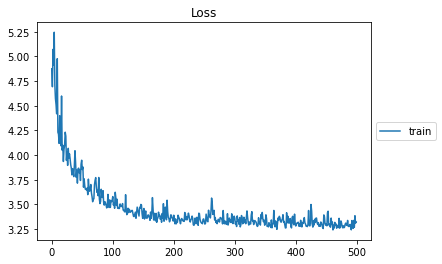

Training results
PICP: 0.9317752939468719
MPIW: 3.178
Test results
PICP: 0.9326755658734764
MPIW: 3.211
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 22, 0.9326755658734764, 3.211, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(39629, 4)
duration is  0.7224059144655863
-------------iteartion--------------  23
Mert new loss
Mert new loss


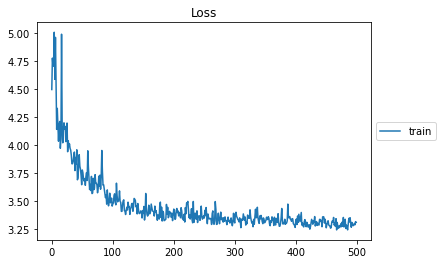

Training results
PICP: 0.9220496443605748
MPIW: 3.13
Test results
PICP: 0.9135229251305862
MPIW: 3.122
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 23, 0.9135229251305862, 3.122, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(41352, 4)
duration is  0.7417265971501669
-------------iteartion--------------  24
Mert new loss
Mert new loss


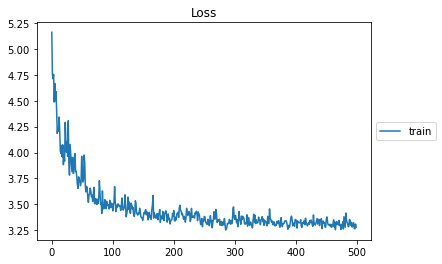

Training results
PICP: 0.9250979822906082
MPIW: 3.155
Test results
PICP: 0.9216482878699942
MPIW: 3.149
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 24, 0.9216482878699942, 3.149, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(43075, 4)
duration is  0.7238240122795105
-------------iteartion--------------  25
Mert new loss
Mert new loss


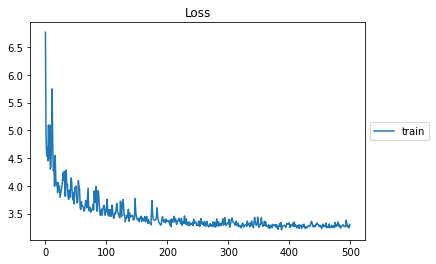

Training results
PICP: 0.93395267818261
MPIW: 3.202
Test results
PICP: 0.9175856065002902
MPIW: 3.206
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 25, 0.9175856065002902, 3.206, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(44798, 4)
duration is  0.6751464088757833
-------------iteartion--------------  26
Mert new loss
Mert new loss


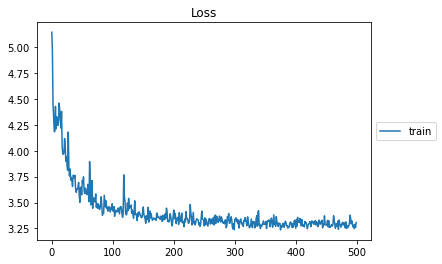

Training results
PICP: 0.929162432863986
MPIW: 3.177
Test results
PICP: 0.9245502031340684
MPIW: 3.174
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 26, 0.9245502031340684, 3.174, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(46521, 4)
duration is  0.7285843968391419
-------------iteartion--------------  27
Mert new loss
Mert new loss


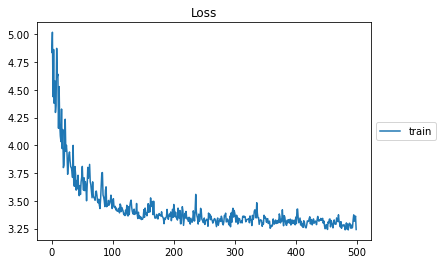

Training results
PICP: 0.9275656844244448
MPIW: 3.133
Test results
PICP: 0.9204875217643644
MPIW: 3.143
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 27, 0.9204875217643644, 3.143, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(48244, 4)
duration is  0.7195719083150228
-------------iteartion--------------  28
Mert new loss
Mert new loss


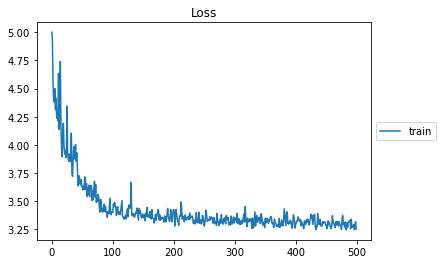

Training results
PICP: 0.9205980548700827
MPIW: 3.1
Test results
PICP: 0.9129425420777714
MPIW: 3.09
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 28, 0.9129425420777714, 3.09, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(49967, 4)
duration is  0.7382226506868999
-------------iteartion--------------  29
Mert new loss
Mert new loss


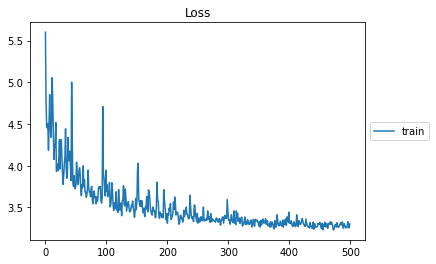

Training results
PICP: 0.9239367106982146
MPIW: 3.137
Test results
PICP: 0.914683691236216
MPIW: 3.127
[120, 25.0, 0.07, 220, 120, 0.002, 1e-05, 29, 0.914683691236216, 3.127, 'Test']


,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


(51690, 4)
duration is  0.734777013460795


In [32]:
result_iter = pd.DataFrame(columns = ['l_b','u_b','actual'])
final_results = pd.DataFrame()
final_results = pd.DataFrame()


list_results_columns = ['neuron_number','lambda','alpha', 'soften','batch_size', 'learning_rate','decay','count','PICP','MPIW','Training/Test']
results_df = pd.DataFrame(columns=list_results_columns)

alpha_ =0.07

neuron_number =120
neuron_number2 = 10
lambda_ = 25.0
soften_ = 220
n_ = 120
learning_rate=0.002
decay=0.00001


epochs = 500
iterations = 1

number_features = len(list(df.columns))-1
count = 0 
start_time = time.time()
final_results = pd.DataFrame(columns=['list_column_name'])



for neuron_number in [1,2 ,3]:
    for lambda_

    print("-------------iteartion-------------- ", i)
    colnames = list(df.columns)
    df = df[colnames]
    train, test = train_test_split(df, test_size=0.2)

    X_train = train[colnames[0:-1]].values

    y_train = train[colnames[-1]].values
    y_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted

    X_test = test[colnames[0:-1]].values
    y_test = test[colnames[-1]].values
    y_test = np.stack((y_test,y_test),axis=1) # make this 2d so will be accepted

    start_time = time.time()
    list_results = []


    model = Sequential()
    model.add(Dense(neuron_number, input_dim=number_features,activation='relu',
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.1)))

    # model.add(Dense(neuron_number/2, input_dim=number_features,activation='relu',
    #                 kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.1)))


    model.add(Dense(2, activation='linear',
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.3), 
                    bias_initializer=keras.initializers.Constant(value=[4.,0.]))) 


    # compile
    # opt = keras.optimizers.Adam(learning_rate=learning_rate, decay=decay)
    # opt = tf.keras.optimizers.Adam(learning_rate=learning_rate, decay_rate=decay)
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate, decay=decay)


    model.compile(loss=qd_objective_paper, optimizer=opt)

    result = model.fit(X_train, np.array(y_train, dtype=np.float64), epochs=epochs, batch_size=n_, verbose=0,  validation_split=0.)
    result_loss=[]
    result_loss.append(result.history['loss'])
    # print(result_loss)
    result_loss = np.array(result_loss).reshape(-1)
    x = range(result_loss.shape[0])
    plt.plot(x, result_loss, label='train')
    plt.title('Loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.ylim(0,10)
    plt.show()

    y_pred = model.predict(X_train, verbose=0)
    y_u_pred = y_pred[:,0]
    y_l_pred = y_pred[:,1]
    K_u = y_u_pred > y_train[:,0]
    K_l = y_l_pred < y_train[:,0]
    print('Training results')
    print('PICP:', np.mean(K_u * K_l))
    print('MPIW:', np.round(np.mean(y_u_pred - y_l_pred),3))

    list_results = [neuron_number,lambda_,alpha_, soften_,n_,learning_rate,decay, count,np.mean(K_u * K_l), np.round(np.mean(y_u_pred - y_l_pred),3),'Training']
    list_results
    results_df.loc[len(results_df)] = list_results

    
    y_pred = model.predict(X_test, verbose=0)
    y_u_pred = y_pred[:,0]
    y_l_pred = y_pred[:,1]
    K_u = y_u_pred > y_test[:,0]
    K_l = y_l_pred < y_test[:,0]
    print('Test results')
    print('PICP:', np.mean(K_u * K_l))
    print('MPIW:', np.round(np.mean(y_u_pred - y_l_pred),3))
    list_results = [neuron_number,lambda_,alpha_, soften_,n_,learning_rate,decay,count, np.mean(K_u * K_l), np.round(np.mean(y_u_pred - y_l_pred),3),'Test']
    results_df.loc[len(results_df)] = list_results
    #                                 results_df.to_excel("02_12_subjectindependent_50.xlsx")

    print(list_results)
    count = count + 1

    display(results_df)
    
    result_iter = pd.DataFrame({
    'l_b': y_l_pred,
    'u_b': y_u_pred,
    'actual': y_test[:,0]})
    
    # 'l_b','u_b','actual','predictions'
    
    final_results = pd.concat([final_results, result_iter], ignore_index=True)
    print(final_results.shape)

    
    end_time = time.time()
    print('duration is ', (end_time - start_time)/60)

In [33]:
results_df

,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,120,25.00,0.07,220,120,0.00,0.00,0,0.92,3.09,Training
1,120,25.00,0.07,220,120,0.00,0.00,0,0.91,3.09,Test
2,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.08,Training
3,120,25.00,0.07,220,120,0.00,0.00,1,0.91,3.07,Test
4,120,25.00,0.07,220,120,0.00,0.00,2,0.92,3.07,Training
5,120,25.00,0.07,220,120,0.00,0.00,2,0.90,3.06,Test
6,120,25.00,0.07,220,120,0.00,0.00,3,0.92,3.15,Training
7,120,25.00,0.07,220,120,0.00,0.00,3,0.91,3.13,Test
8,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.12,Training
9,120,25.00,0.07,220,120,0.00,0.00,4,0.92,3.13,Test


In [34]:
# final_results.to_excel("myLoss_results_95.xlsx")
# results_df.to_excel("myLoss_results_details_95.xlsx")

resultlarim = final_results.groupby(['actual']).agg({'l_b':'mean','u_b':'mean'}).reset_index()
display(resultlarim)

PICP_calc = results_df.PICP.mean()
MPIW_calc = results_df.MPIW.mean()

print('Average PICP: ', PICP_calc)
print('Average MPIW: ',MPIW_calc)


,actual,l_b,u_b
0,0.00,0.03,3.29
1,1.00,0.15,3.45
2,2.00,0.26,3.53
3,3.00,0.52,3.70
4,4.00,1.04,3.85


Average PICP:  0.9226601361708322
Average MPIW:  3.160283088684082


In [30]:
# final_results = pd.read_excel("myLoss_results_95.xlsx")
# results_df = pd.read_excel("myLoss_results_details_95.xlsx")
resultlarim = final_results.groupby(['actual']).agg({'l_b':'mean','u_b':'mean'}).reset_index()
display(resultlarim)

PICP_calc = results_df.PICP.mean()
MPIW_calc = results_df.MPIW.mean()

print('Average PICP: ', PICP_calc)
print('Average MPIW: ',MPIW_calc)


,actual,l_b,u_b
0,0,-0.17,4.02
1,1,-0.03,4.20
2,2,0.04,4.26
3,3,0.21,4.43
4,4,0.47,4.62


Average PICP:  0.92460641747461
Average MPIW:  4.194750130176544


In [31]:
results_df

,Unnamed: 0,neuron_number,lambda,alpha,soften,batch_size,learning_rate,decay,count,PICP,MPIW,Training/Test
0,0,120,25,0.07,220,120,0.00,0.00,0,0.91,3.87,Training
1,1,120,25,0.07,220,120,0.00,0.00,0,0.90,3.91,Test
2,2,120,25,0.07,220,120,0.00,0.00,1,0.94,4.50,Training
3,3,120,25,0.07,220,120,0.00,0.00,1,0.94,4.50,Test
